In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [2]:
path = '../datasets_full/Rio/'
brazil = pd.read_csv(path + 'brazil_unemployment.csv')  # Rio, Brazil

In [3]:
display(brazil)

,year,quarter,category,state,value
0,2012,Q1,Workforce - Employed,Rondônia,701
1,2012,Q1,Workforce - Employed,Acre,286
2,2012,Q1,Workforce - Employed,Amazonas,1392
3,2012,Q1,Workforce - Employed,Roraima,170
4,2012,Q1,Workforce - Employed,Pará,3123
...,...,...,...,...,...
2668,2020,Q1,Outside the workforce,Rio Grande do Sul,3487
2669,2020,Q1,Outside the workforce,Mato Grosso do Sul,780
2670,2020,Q1,Outside the workforce,Mato Grosso,905
2671,2020,Q1,Outside the workforce,Goiás,2014


In [4]:
brazil.category.unique()

array(['Workforce - Employed', 'Workforce - Unemployed',
       'Outside the workforce'], dtype=object)

In [5]:
df_employed = brazil.loc[brazil['category']=='Workforce - Employed',:].set_index(['year', 'quarter', 'state'])
df_employed = df_employed.rename(columns={'value': 'employed_population'})
display(df_employed)

df_unemployed = brazil.loc[brazil['category']=='Workforce - Unemployed',:].set_index(['year', 'quarter', 'state'])
df_unemployed = df_unemployed.rename(columns={'value': 'unemployed_population'})

df = pd.concat([df_employed, df_unemployed], axis=1, join='inner')
df['employment_rate'] = df['employed_population']/(df['employed_population'] + df['unemployed_population'])
display(df)

# df = pd.pivot_table(brazil, values='value', index=['year', 'quarter'],columns=['state'])
# display(df)

category  employed_population
year quarter state                                                        
2012 Q1      Rondônia            Workforce - Employed                  701
             Acre                Workforce - Employed                  286
             Amazonas            Workforce - Employed                 1392
             Roraima             Workforce - Employed                  170
             Pará                Workforce - Employed                 3123
...                                               ...                  ...
2020 Q1      Rio Grande do Sul   Workforce - Employed                 5579
             Mato Grosso do Sul  Workforce - Employed                 1292
             Mato Grosso         Workforce - Employed                 1679
             Goiás               Workforce - Employed                 3311
             Distrito Federal    Workforce - Employed                 1428

[891 rows x 2 columns]

category  employed_population  \
year quarter state                                                           
2012 Q1      Rondônia            Workforce - Employed                  701   
             Acre                Workforce - Employed                  286   
             Amazonas            Workforce - Employed                 1392   
             Roraima             Workforce - Employed                  170   
             Pará                Workforce - Employed                 3123   
...                                               ...                  ...   
2020 Q1      Rio Grande do Sul   Workforce - Employed                 5579   
             Mato Grosso do Sul  Workforce - Employed                 1292   
             Mato Grosso         Workforce - Employed                 1679   
             Goiás               Workforce - Employed                 3311   
             Distrito Federal    Workforce - Employed                 1428   

                                               category  \
year quarter state                                        
2012 Q1      Rondônia            Workforce - Unemployed   
             Acre                Workforce - Unemployed   
             Amazonas            Workforce - Unemployed   
             Roraima             Workforce - Unemployed   
             Pará                Workforce - Unemployed   
...                                                 ...   
2020 Q1      Rio Grande do Sul   Workforce - Unemployed   
             Mato Grosso do Sul  Workforce - Unemployed   
             Mato Grosso         Workforce - Unemployed   
             Goiás               Workforce - Unemployed   
             Distrito Federal    Workforce - Unemployed   

                                 unemployed_population  employment_rate  
year quarter state                                                       
2012 Q1      Rondônia                               61         0.919948  
             Acre                                   28         0.910828  
             Amazonas                              172         0.890026  
             Roraima                                16         0.913978  
             Pará                                  268         0.920967  
...                                                ...              ...  
2020 Q1      Rio Grande do Sul                     504         0.917146  
             Mato Grosso do Sul                    107         0.923517  
             Mato Grosso                           156         0.914986  
             Goiás                                 423         0.886717  
             Distrito Federal                      226         0.863362  

[891 rows x 5 columns]

In [6]:
df_employed_rate = df['employment_rate']
df_employed_rate = df_employed_rate.reset_index(level='state')
display(df_employed_rate)

state  employment_rate
year quarter                                     
2012 Q1                 Rondônia         0.919948
     Q1                     Acre         0.910828
     Q1                 Amazonas         0.890026
     Q1                  Roraima         0.913978
     Q1                     Pará         0.920967
...                          ...              ...
2020 Q1        Rio Grande do Sul         0.917146
     Q1       Mato Grosso do Sul         0.923517
     Q1              Mato Grosso         0.914986
     Q1                    Goiás         0.886717
     Q1         Distrito Federal         0.863362

[891 rows x 2 columns]

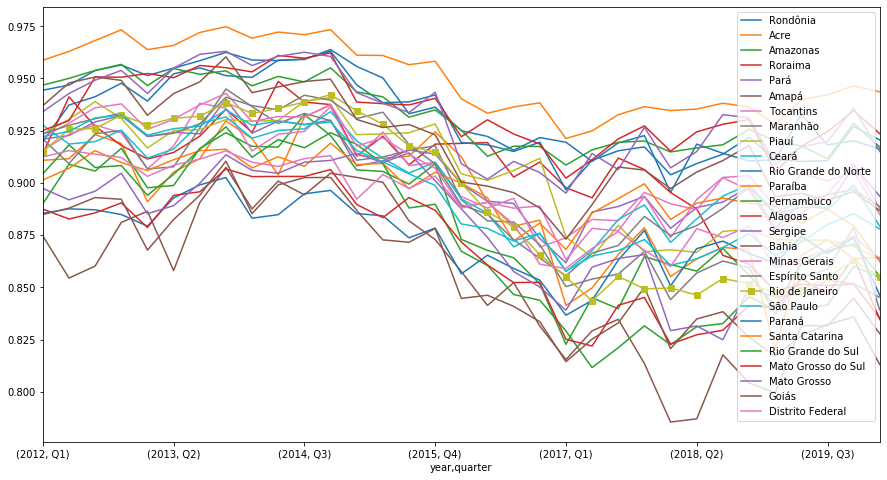

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
for state in df_employed_rate.state.unique():
    df_plot = df_employed_rate.loc[df_employed_rate['state']==state, 'employment_rate']
    if state=='Rio de Janeiro':
        df_plot.plot(ax=ax, label=state, marker='s')
    else:
        df_plot.plot(ax=ax, label=state)
ax.legend(loc='center left', title='States of Brazil', bbox_to_anchor=(1, 0.5));
# ax.axvline(x=(2016, 'Q3'), linewidth=10, color='lightgray', alpha=0.4)
    
#     ax.axvline(x='()', linewidth=10, color='lightgray', alpha=0.4, label='London 2012 Olympics')

plt.legend()